In [1]:
import praw
import pandas as pd
import requests
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import re
from config import client_id,client_secret,user_agent,password,username

nltk.downloader.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

/Users/michal/opt/anaconda3/envs/stat/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/michal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/michal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

In [20]:
def get_comments_df(url, keywords=None, sort=None, ascending=False):

    comment_data=[]

    submission = reddit.submission(url=url)

    if sort:
        submission.comment_sort = sort

    submission.comments.replace_more(limit=0)
    
    for comment in submission.comments.list():
        comment_data.append([comment.body, comment.score, comment.created_utc])

    df = pd.DataFrame(comment_data, columns=['body', 'score', 'utc_code'])
    df['body'] = df['body'].str.strip().replace('\n', ' ')

    if keywords:
        df = df[df['body'].str.contains('|'.join(keywords), case=False)]

    df_sorted = df.sort_values('score', ascending=ascending).reset_index(drop=True)

    return(df_sorted)


In [21]:
url = 'https://www.reddit.com/r/nba/comments/1365zfw/game_thread_los_angeles_lakers_00_golden_state/?sort=controversial&limit=500'
keywords = ["lakers", "lal"]

In [13]:
df = get_comments_df(url, sort = 'best', ascending=True)#, keywords = keywords)
print(df.head(),'\n', f"length of query: {len(df)}")

                                                body  score      utc_code
0  The Kings series was so brutal. It's hard to b...      7  1.683081e+09
1                   i just love the toxicity in here      7  1.683084e+09
2                             Where the fuck is Rui?      7  1.683087e+09
3            Loon eating boards he don’t give a fuck      7  1.683081e+09
4  AD can't carry the offense *and* have to fight...      7  1.683081e+09 
 length of query: 496


In [23]:
game_1 = "https://www.reddit.com/r/nba/comments/1365zfw/game_thread_los_angeles_lakers_00_golden_state/"
game_2 = "https://www.reddit.com/r/nba/comments/1384hu8/game_thread_los_angeles_lakers_10_golden_state/"
game_3 = "https://www.reddit.com/r/nba/comments/13a5us2/game_thread_golden_state_warriors_11_los_angeles/"
game_4 = "https://www.reddit.com/r/nba/comments/13can6x/game_thread_golden_state_warriors_12_los_angeles/"
game_5 = "https://www.reddit.com/r/nba/comments/13e8sqq/game_thread_los_angeles_lakers_31_golden_state/"
game_6 = "https://www.reddit.com/r/nba/comments/13g2qr3/game_thread_golden_state_warriors_23_los_angeles/"

games = [game_1,game_2,game_3,game_4,game_5,game_6]


In [24]:
for game in games:
    submission = reddit.submission(url=game)
    print(len(submission.comments(limit=None).list()))

TypeError: 'CommentForest' object is not callable

In [36]:
top_level_comments = list(submission.comments)
all_comments = submission.comments.list()


In [26]:
url = "https://www.reddit.com/r/nba/comments/1365zfw/game_thread_los_angeles_lakers_00_golden_state/.json"

# Send a GET request to retrieve the JSON data
response = requests.get(url, headers={"User-agent": "nba-sentiment/1.0 (by u/moneymichal)" })
data = response.json()

comments = data[1]["data"]["children"]
comments

TypeError: request() got an unexpected keyword argument 'limit'

In [30]:
# Set the URL of the Reddit thread
url = "https://www.reddit.com/r/nba/comments/1365zfw/game_thread_los_angeles_lakers_00_golden_state/.json"

# Send a GET request to retrieve the JSON data
response = requests.get(url, headers={"User-agent": "nba-sentiment/1.0 (by u/moneymichal)", "limit" : "None"})

# Check if the request was successful
if response.status_code == 200:
    # Get the JSON data from the response
    data = response.json()

    # Extract the list of comment objects from the JSON data
    comments = data[1]["data"]["children"]

    # Filter and process the top-level comments
    top_level_comments = []

    for comment in comments:
        if comment["data"]["parent_id"].startswith("t3_"):
            top_level_comments.append(comment["data"])

    print("Total top-level comments:", len(top_level_comments))
else:
    print("Error:", response.status_code)

Total top-level comments: 40


In [15]:
top_level_comments

[{'subreddit_id': 't5_2qo4s',
  'approved_at_utc': None,
  'author_is_blocked': False,
  'comment_type': None,
  'awarders': [],
  'mod_reason_by': None,
  'banned_by': None,
  'author_flair_type': 'text',
  'total_awards_received': 0,
  'subreddit': 'nba',
  'author_flair_template_id': None,
  'likes': None,
  'replies': '',
  'user_reports': [],
  'saved': False,
  'id': 'jjyk9d6',
  'banned_at_utc': None,
  'mod_reason_title': None,
  'gilded': 0,
  'archived': False,
  'collapsed_reason_code': None,
  'no_follow': True,
  'author': 'Vegetable_Yam5928',
  'can_mod_post': False,
  'created_utc': 1683949891.0,
  'send_replies': True,
  'parent_id': 't3_1365zfw',
  'score': 2,
  'author_fullname': 't2_hk0ocqrr',
  'approved_by': None,
  'mod_note': None,
  'all_awardings': [],
  'collapsed': False,
  'body': 'He is HIM',
  'edited': False,
  'top_awarded_type': None,
  'author_flair_css_class': None,
  'name': 't1_jjyk9d6',
  'is_submitter': False,
  'downs': 0,
  'author_flair_richtex

In [120]:
data = {
    "game_1" : "https://www.reddit.com/r/nba/comments/1365zfw/game_thread_los_angeles_lakers_00_golden_state/",
    "game_2" : "https://www.reddit.com/r/nba/comments/1384hu8/game_thread_los_angeles_lakers_10_golden_state/",
    "game_3" : "https://www.reddit.com/r/nba/comments/13a5us2/game_thread_golden_state_warriors_11_los_angeles/",
    "game_4" : "https://www.reddit.com/r/nba/comments/13can6x/game_thread_golden_state_warriors_12_los_angeles/",
    "game_5" : "https://www.reddit.com/r/nba/comments/13e8sqq/game_thread_los_angeles_lakers_31_golden_state/",
    "game_6" : "https://www.reddit.com/r/nba/comments/13g2qr3/game_thread_golden_state_warriors_23_los_angeles/"
}

In [123]:
def get_all_comments_df(url, filename):

    submission = reddit.submission(url=url)

    submission.comments.replace_more(limit=None)

    data= []

    all_comments = submission.comments.list()
    for comment in all_comments:
        if comment.parent_id.startswith('t3_'):
            data.append([comment.id, comment.body, comment.score, comment.created_utc, comment.parent_id])
            
    column_names = ['id','body', 'score', 'created_utc', 'parent_id']

    df = pd.DataFrame(data, columns=column_names)
    df.to_csv(filename+'.csv', index=False)

    print("Just Finished Creating dataset: " + filename)
    return df


for key,value in data.items():
    get_all_comments_df(value, key)

In [127]:
### DATASETS CREATED FROM THIS CHUNK

def get_all_comments_df(url, filename):

    submission = reddit.submission(url=url)

    submission.comments.replace_more(limit=0)

    data= []

    all_comments = submission.comments.list()
    for comment in all_comments:
        if comment.parent_id.startswith('t3_'):
            data.append([comment.id, comment.body, comment.score, comment.created_utc, comment.parent_id])
            
    column_names = ['id','body', 'score', 'created_utc', 'parent_id']

    df = pd.DataFrame(data, columns=column_names)
    df.to_csv(filename+'.csv', index=False)

    print("Just Finished Creating dataset: " + filename)
    return df


for key,value in data.items():
    get_all_comments_df(value, key)

Just Finished Creating dataset: game_1
Just Finished Creating dataset: game_2
Just Finished Creating dataset: game_3
Just Finished Creating dataset: game_4
Just Finished Creating dataset: game_5
Just Finished Creating dataset: game_6


In [129]:
game_1_df= pd.read_csv("game_1.csv")


In [130]:
game_1_df

,id,body,score,created_utc,parent_id
0,jin2fth,Filipino Civil War about to begin,216,1.683077e+09,t3_1365zfw
1,jingvv2,The moment Poole hit that 3rd three you knew h...,100,1.683083e+09,t3_1365zfw
2,jinruu4,Someone literally said earlier in the game lak...,81,1.683089e+09,t3_1365zfw
3,jin1h4k,"Flair up everyone. It’s going to get toxic, we...",211,1.683076e+09,t3_1365zfw
4,jin03zs,Ah yes the battle of the two most respectful u...,242,1.683076e+09,t3_1365zfw
...,...,...,...,...,...
471,jincm07,Loon eating boards he don’t give a fuck,8,1.683081e+09,t3_1365zfw
472,jincmf1,"Oh god, the AD v Looney spicy takes are happening",8,1.683081e+09,t3_1365zfw
473,jincmmr,AD can't carry the offense *and* have to fight...,8,1.683081e+09,t3_1365zfw
474,jincn0e,Don't forget to drink water and stay hydrated ...,7,1.683081e+09,t3_1365zfw


In [157]:
### Pre-processing

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r"\d+", "", text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text

In [3]:
print(set(stopwords.words('english')))

{'into', 'which', 'nor', 'shan', 'ourselves', 'd', 'then', 'against', 'who', 'myself', 'theirs', 'we', 'himself', 'than', 'so', 'm', 'but', 'be', 'for', 's', 'once', 'does', 'between', 'other', 'wouldn', 'up', 'them', 'now', 've', 'isn', 'his', 'it', 'they', 'under', "won't", 'haven', "needn't", "couldn't", 'about', 'did', "isn't", 'doesn', 'such', 't', 'few', 'won', 'their', 'its', 'your', 'were', "you're", "she's", 'didn', 'down', 'not', 'couldn', 'will', 'those', 'have', 'how', 'by', 'some', 'am', 'when', 'y', 'why', 'from', 'o', 'before', 'if', 'further', 'having', "doesn't", 'doing', "wouldn't", 'had', 're', 'this', 'are', "mightn't", 'on', 'each', "weren't", 'that', 'no', 'has', 'off', 'both', 'itself', 'what', "it's", 'mightn', 'i', 'through', 'herself', "shouldn't", 'as', 'same', "haven't", 'out', 'wasn', 'being', "shan't", "that'll", 'he', 'she', 'there', 'hers', 'yourselves', "didn't", 'in', "mustn't", 'above', 'themselves', 'of', 'while', 'with', 'only', 'more', 'needn', 'ar

In [158]:
game_1_df['preprocessed_comments'] = game_1_df['body'].apply(preprocess_text)
game_1_df['preprocessed_comments']

0                               filipino civil war begin
1      moment pool hit rd three knew gon na take dumb...
2      someon liter said earlier game laker play ches...
3      flair everyon go get toxic need know everyon s...
4      ah ye battl two respect upstand least obnoxi f...
                             ...                        
471                        loon eat board dont give fuck
472                 oh god ad v looney spici take happen
473        ad cant carri offens fight loongod board game
474             dont forget drink water stay hydrat yall
475         halfway first looney get rebound alreadi man
Name: preprocessed_comments, Length: 476, dtype: object

In [159]:
sia = SentimentIntensityAnalyzer()

game_1_df['sentiment_scores'] = game_1_df['preprocessed_comments'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [161]:
game_1_df["sentiment_scores"].mean()

0.08392542016806721

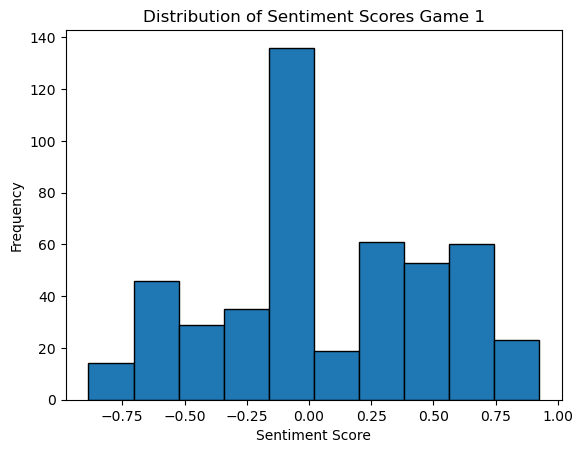

In [162]:
plt.hist(game_1_df['sentiment_scores'], bins=10, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores Game 1')
plt.show()

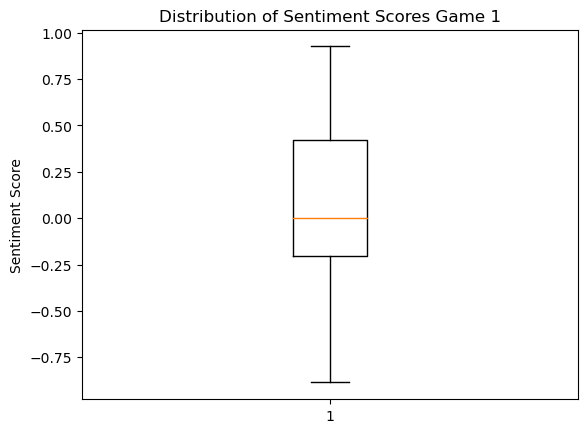

In [163]:
plt.boxplot(game_1_df['sentiment_scores'])
plt.ylabel('Sentiment Score')
plt.title('Distribution of Sentiment Scores Game 1')
plt.show()